In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.simplefilter('ignore')


In [5]:
#read the data
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [32]:
#checking for null values
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
#lets check shape 
car_data.shape

(205, 26)

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 1 Patch objects>)

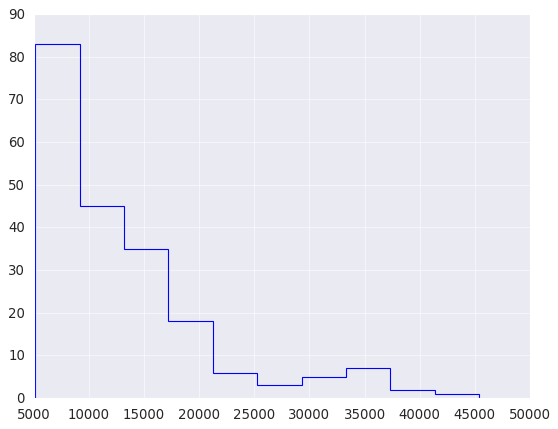

In [71]:
sns.set_style('darkgrid')
plt.hist(car_data['price'],histtype='step')

In [10]:
#get a feel for the numbers
car_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [34]:
#extracting only the company name
car_data['CarName']=car_data['CarName'].str.split(" ").str[0]

In [36]:
#Checking unique values of car companies:
car_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [37]:
#Fixing and replacing the data each car brands: (removing spelling error)
car_data['CarName']=car_data['CarName'].str.replace("Nissan","nissan")
car_data['CarName']=car_data['CarName'].str.replace("vokswagen","volkswagen")
car_data['CarName']=car_data['CarName'].str.replace("porcshce","porsche")
car_data['CarName']=car_data['CarName'].str.replace("toyouta","toyota")
car_data['CarName']=car_data['CarName'].str.replace("vw","volkswagen")
car_data['CarName']=car_data['CarName'].str.replace("maxda","mazda")
#Summary statistics of PRICE across each type of car company:
car_data.groupby('CarName')['price'].describe()

count          mean          std      min        25%      50%  \
CarName                                                                      
alfa-romero    3.0  15498.333333  1734.937559  13495.0  14997.500  16500.0   
audi           7.0  17859.166714  3151.576876  13950.0  16350.000  17710.0   
bmw            8.0  26118.750000  9263.832033  16430.0  19958.750  22835.0   
buick          8.0  33647.000000  6789.560306  25552.0  28230.000  32892.0   
chevrolet      3.0   6007.000000   754.421633   5151.0   5723.000   6295.0   
dodge          9.0   7875.444444  2213.386044   5572.0   6377.000   7609.0   
honda         13.0   8184.692308  2061.672112   5399.0   6855.000   7295.0   
isuzu          4.0   8916.500000  1740.362462   6785.0   8383.625   8916.5   
jaguar         3.0  34600.000000  2047.559523  32250.0  33900.000  35550.0   
mazda         17.0  10652.882353  3975.682094   5195.0   7395.000  10595.0   
mercury        1.0  16503.000000          NaN  16503.0  16503.000  16503.0   
mitsubishi    13.0   9239.769231  3042.998690   5389.0   6989.000   8499.0   
nissan        18.0  10415.666667  4477.394200   5499.0   7311.500   8124.0   
peugeot       11.0  15489.090909  2246.749673  11900.0  13530.000  16630.0   
plymouth       7.0   7963.428571  2395.544257   5572.0   6460.500   7609.0   
porsche        5.0  31400.500000  5654.093097  22018.0  31400.500  32528.0   
renault        2.0   9595.000000   424.264069   9295.0   9445.000   9595.0   
saab           6.0  15223.333333  2860.794761  11850.0  12887.500  15275.0   
subaru        12.0   8541.250000  1940.191468   5118.0   7378.750   7894.0   
toyota        32.0   9885.812500  3204.982114   5348.0   7870.500   9103.0   
volkswagen    12.0  10077.500000  2178.549872   7775.0   8145.000   9737.5   
volvo         11.0  18063.181818  3314.650263  12940.0  16250.000  18420.0   

                    75%      max  
CarName                           
alfa-romero  16500.0000  16500.0  
audi         18389.5835  23875.0  
bmw          32290.0000  41315.0  
buick        36532.0000  45400.0  
chevrolet     6435.0000   6575.0  
dodge         8558.0000  12964.0  
honda         9095.0000  12945.0  
isuzu         9449.3750  11048.0  
jaguar       35775.0000  36000.0  
mazda        11845.0000  18344.0  
mercury      16503.0000  16503.0  
mitsubishi    9959.0000  14869.0  
nissan       13499.0000  19699.0  
peugeot      16987.5000  18150.0  
plymouth      8439.0000  12764.0  
porsche      34028.0000  37028.0  
renault       9745.0000   9895.0  
saab         17490.0000  18620.0  
subaru       10019.5000  11694.0  
toyota       10973.2500  17669.0  
volkswagen   11768.7500  13845.0  
volvo        20265.0000  22625.0

In [38]:
# just checking some more details, doing more EDA
car_data.groupby('fueltype')['price'].describe()

count        mean          std     min     25%      50%      75%  \
fueltype                                                                     
diesel     20.0  15838.1500  7759.843713  7099.0  9120.0  13852.5  19375.5   
gas       185.0  12999.7982  7984.409306  5118.0  7689.0   9989.0  15998.0   

              max  
fueltype           
diesel    31600.0  
gas       45400.0

In [39]:
#Summary statistics of PRICE across aspiration:
car_data.groupby('aspiration')['price'].describe()

count          mean          std     min      25%      50%  \
aspiration                                                               
std         168.0  12611.270833  8214.342183  5118.0   7446.0   9418.0   
turbo        37.0  16298.166676  6098.889385  7689.0  11694.0  16503.0   

                75%      max  
aspiration                    
std         15527.5  45400.0  
turbo       18950.0  31600.0

In [40]:
#Summary statistics of PRICE across number of doors in car:
car_data.groupby('doornumber')['price'].describe()

count          mean          std     min     25%      50%  \
doornumber                                                              
four        115.0  13501.152174  7338.296321  6229.0  8006.0  10898.0   
two          90.0  12989.924078  8784.227805  5118.0  7171.5   9927.0   

                 75%      max  
doornumber                     
four        16872.50  40960.0  
two         15909.75  45400.0

In [41]:
#Summary statistics of PRICE across bodytype of car:
car_data.groupby('carbody')['price'].describe()

count          mean           std      min       25%      50%  \
carbody                                                                      
convertible    6.0  21890.500000  11187.802193  11595.0  14246.25  17084.5   
hardtop        8.0  22208.500000  14555.520749   8249.0   9341.50  19687.5   
hatchback     70.0  10376.652386   4909.641988   5118.0   6564.00   8897.0   
sedan         96.0  14344.270833   8470.487812   5499.0   8042.25  10846.5   
wagon         25.0  12371.960000   5120.948695   6918.0   8013.00  11694.0   

                  75%      max  
carbody                         
convertible  30709.25  37028.0  
hardtop      32903.00  45400.0  
hatchback    12730.25  31400.5  
sedan        17770.00  41315.0  
wagon        15750.00  28248.0

In [42]:
#Summary statistics of PRICE across drivewheel:
car_data.groupby('drivewheel')['price'].describe()

count          mean          std     min       25%      50%  \
drivewheel                                                                
4wd           9.0  11087.463000  3988.644756  7603.0   8013.00   9233.0   
fwd         120.0   9239.308333  3317.930730  5118.0   6976.25   8222.0   
rwd          76.0  19910.809211  9120.137883  6785.0  13475.00  16912.5   

                75%        max  
drivewheel                      
4wd         11694.0  17859.167  
fwd         10307.5  23875.000  
rwd         23110.0  45400.000

In [48]:
#Summary statistics of PRICE across engine type:
car_data.groupby('enginetype')['price'].describe()

count          mean           std      min       25%      50%  \
enginetype                                                                  
dohc         12.0  18116.416667   7963.955772   9298.0  15141.25  16249.0   
dohcv         1.0  31400.500000           NaN  31400.5  31400.50  31400.5   
l            12.0  14627.583333   3673.598940   5151.0  13010.00  16105.0   
ohc         148.0  11574.048426   6407.833422   5195.0   7383.50   9022.0   
ohcf         15.0  13738.600000  10930.477030   5118.0   7533.00   9233.0   
ohcv         13.0  25098.384615  11442.925722  13499.0  16500.00  19699.0   
rotor         4.0  13020.000000   2079.062289  10945.0  11620.00  12745.0   

                 75%      max  
enginetype                     
dohc        18267.50  35550.0  
dohcv       31400.50  31400.5  
l           16943.75  18150.0  
ohc         13522.50  41315.0  
ohcf        11476.50  37028.0  
ohcv        35056.00  45400.0  
rotor       14145.00  15645.0

In [49]:
#Summary statistics of PRICE across cylinder number:
car_data.groupby('cylindernumber')['price'].describe()

count          mean          std      min      25%      50%  \
cylindernumber                                                                
eight             5.0  37400.100000  5667.993300  31400.5  34184.0  35056.0   
five             11.0  21630.469727  6091.385336  13295.0  17580.0  18920.0   
four            159.0  10285.754717  3921.610470   5118.0   7372.0   8948.0   
six              24.0  23671.833333  8850.138258  13499.0  16374.5  21037.5   
three             1.0   5151.000000          NaN   5151.0   5151.0   5151.0   
twelve            1.0  36000.000000          NaN  36000.0  36000.0  36000.0   
two               4.0  13020.000000  2079.062289  10945.0  11620.0  12745.0   

                    75%      max  
cylindernumber                    
eight           40960.0  45400.0  
five            26864.0  31600.0  
four            12365.0  22625.0  
six             32319.5  41315.0  
three            5151.0   5151.0  
twelve          36000.0  36000.0  
two             14145.0  15645.0

In [50]:
#Summary statistics of PRICE across fuel system:
car_data.groupby('fuelsystem')['price'].describe()

count          mean          std      min       25%      50%  \
fuelsystem                                                                 
1bbl         11.0   7555.545455  1390.120884   5399.0   6692.00   7295.0   
2bbl         66.0   7478.151515  1385.361935   5118.0   6593.50   7372.0   
4bbl          3.0  12145.000000  1374.772708  10945.0  11395.00  11845.0   
idi          20.0  15838.150000  7759.843713   7099.0   9120.00  13852.5   
mfi           1.0  12964.000000          NaN  12964.0  12964.00  12964.0   
mpfi         94.0  17754.602840  8685.893626   7957.0  11619.75  15991.5   
spdi          9.0  10990.444444  2741.731438   7689.0   9279.00   9959.0   
spfi          1.0  11048.000000          NaN  11048.0  11048.00  11048.0   

                 75%      max  
fuelsystem                     
1bbl         8370.00  10295.0  
2bbl         8330.75  11245.0  
4bbl        12745.00  13645.0  
idi         19375.50  31600.0  
mfi         12964.00  12964.0  
mpfi        18942.50  45400.0  
spdi        12764.00  14869.0  
spfi        11048.00  11048.0

#### in fuel system notice now mpfi almost becomes an outlier alogn with idi but mpfi has more car salees followed by 2bbl. but not significant. 
#### In cylinder number, there are no outliers
#### In engine types, ohc are most popular engine type

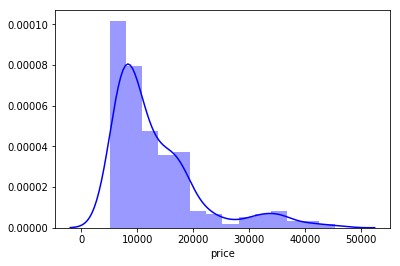

In [43]:
#Visualization of Price distribution:
sns.distplot(car_data['price'],color='blue')

#### So the sweet spot for price is distributed between ~5000 and ~18000

<function matplotlib.pyplot.show(*args, **kw)>

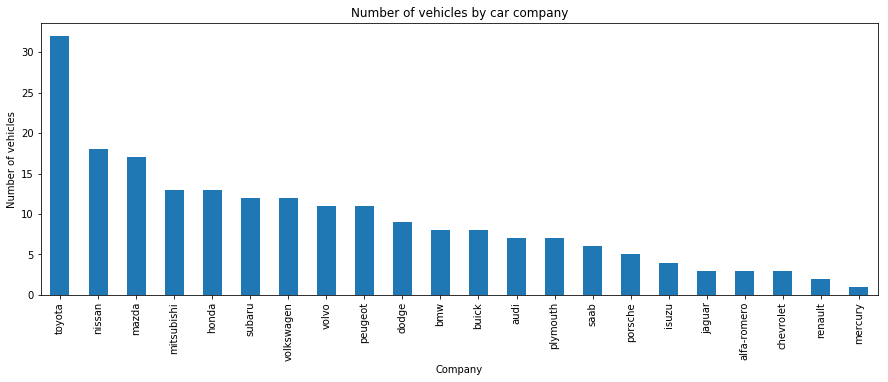

In [46]:
# Now lets check who makes the highest sales by company
car_data['CarName'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by car company")
plt.ylabel('Number of vehicles')
plt.xlabel('Company')
plt.show

#### Toyota sells the most number of cars followed by Nissan and Mazda, and the ones who sell the least are renault and mercury

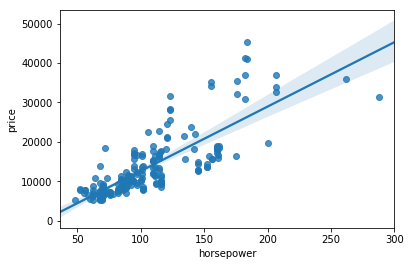

In [12]:
# visualize the data, when we visualize, we will have more clarity about the data
sns.regplot(x='horsepower', y='price', data=car_data)

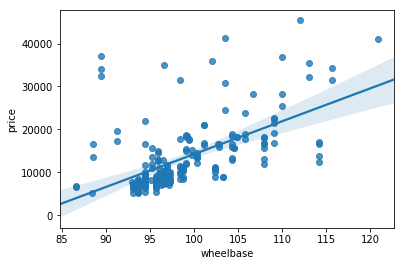

In [13]:
# visualize the data
sns.regplot(x='wheelbase', y='price', data=car_data)

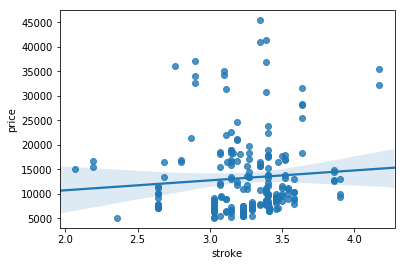

In [14]:
# visualize the data
sns.regplot(x='stroke', y='price', data=car_data)

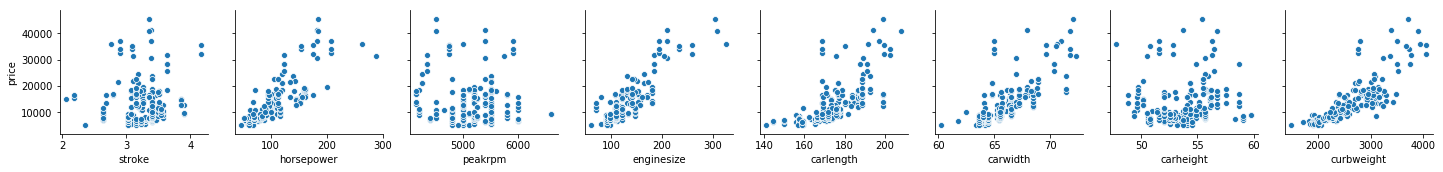

In [15]:
# visualize the data - to get a strong intuitive understanding. 
sns.pairplot(data=car_data, x_vars=['stroke', 'horsepower', 'peakrpm', 'enginesize', 'carlength', 'carwidth', 'carheight', 'curbweight'],
            y_vars='price')

### looks like enginesize, carlength, horsepower and curbweight gives a good degree of confidence

In [17]:
car_data.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

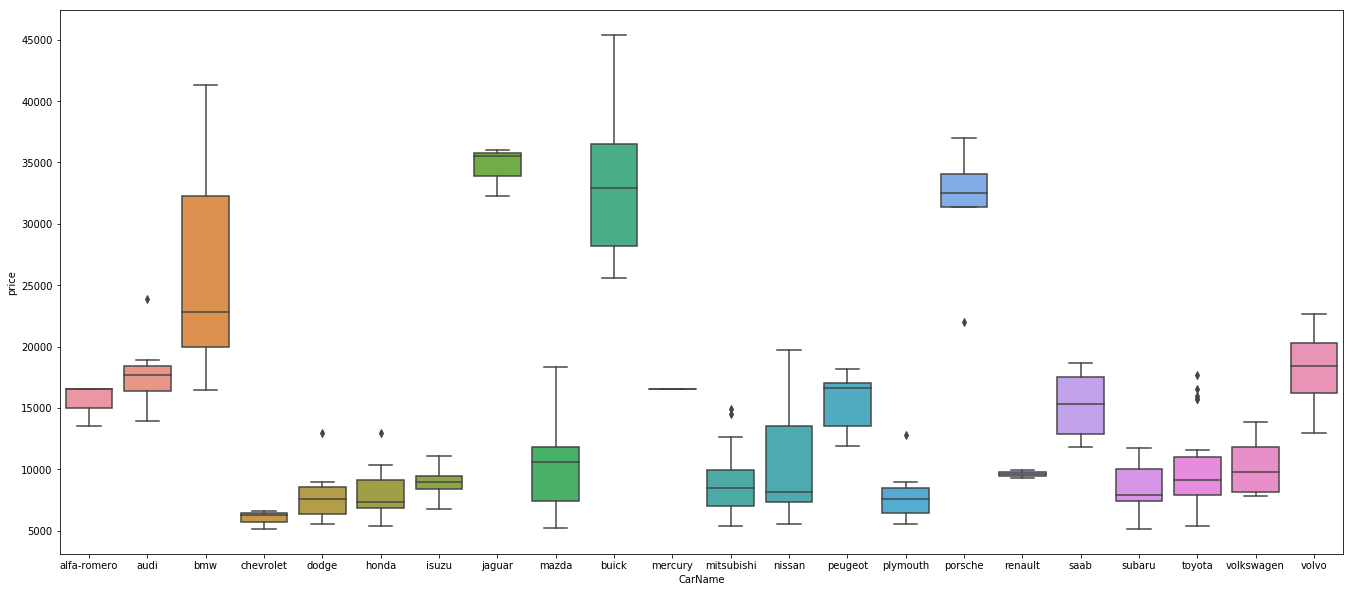

In [47]:
#Visualization of price across brands of manufactures:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(car_data["CarName"],car_data["price"])

#### from the above box plot we can see that BMW, Buick, Jaguar and Porche have higher price. Where as Chevrolet, Subary Toyota are on low price

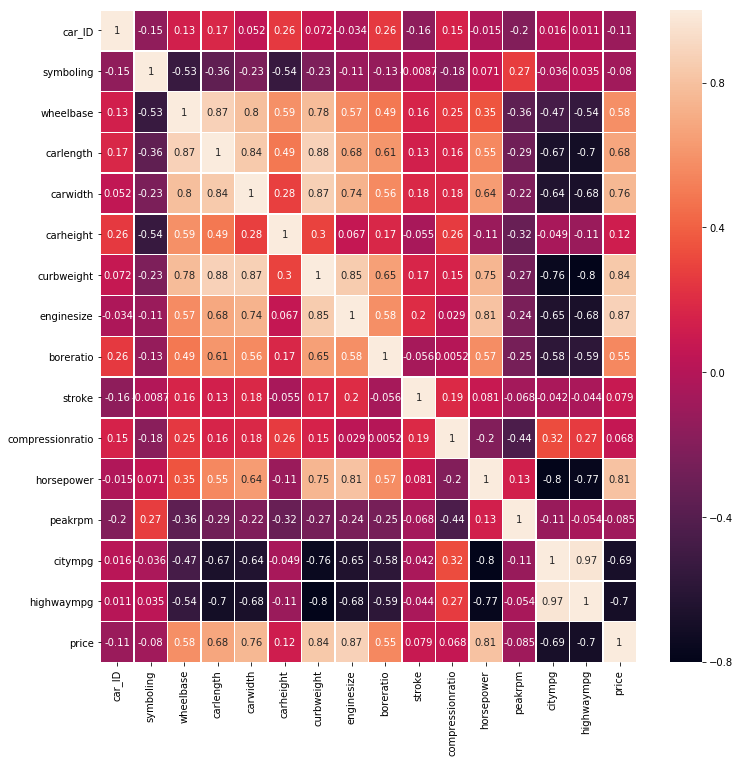

In [21]:
fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(car_data.corr(), annot=True, linewidths=.5, ax=ax)

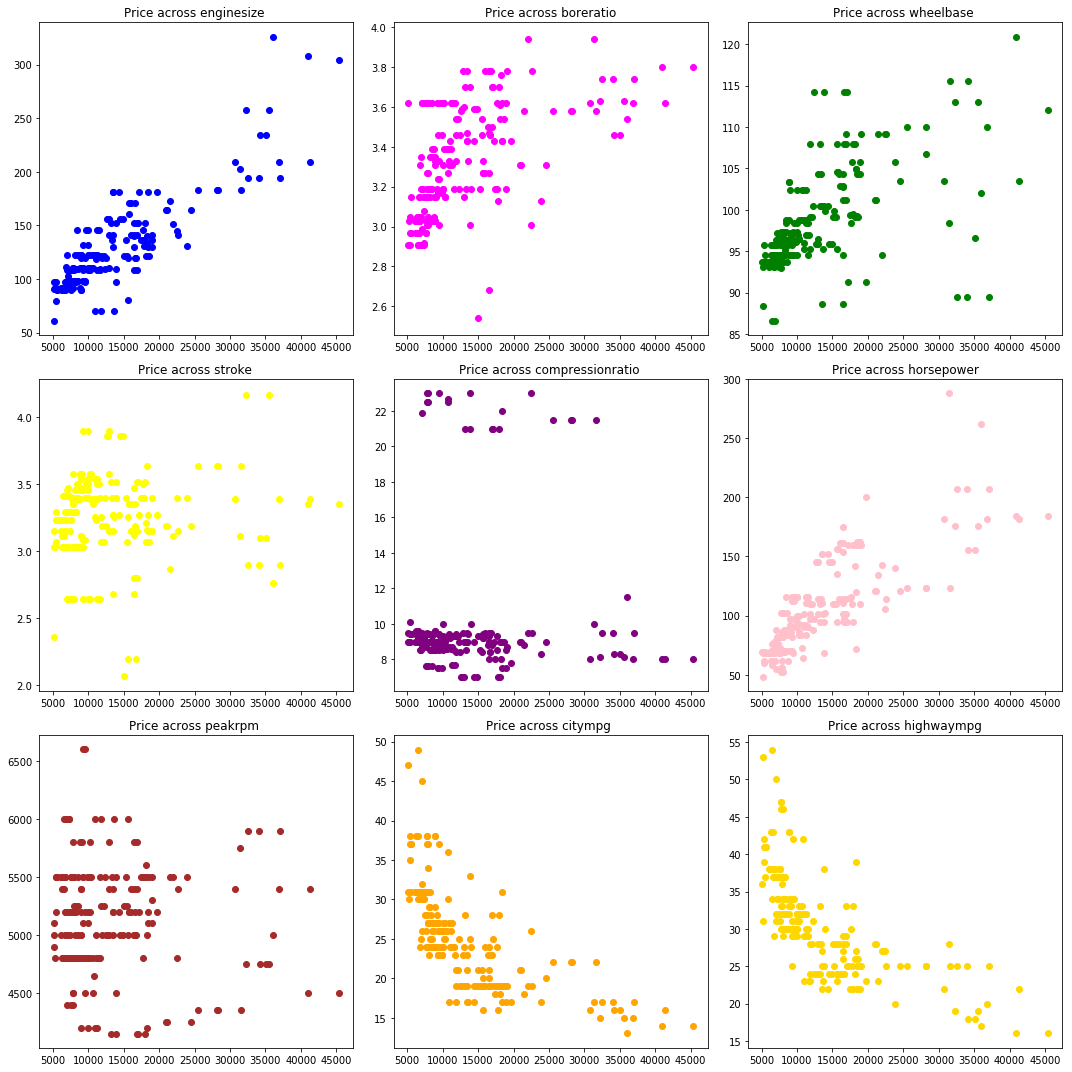

In [52]:
#Visualization of AVERAGE PRICE across each continuous attributes:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.scatter(car_data['price'],car_data['enginesize'],color='blue')
plt.title("Price across enginesize ")
plt.subplot(3,3,2)
plt.scatter(car_data['price'],car_data['boreratio'],color='magenta')
plt.title("Price across boreratio")
plt.subplot(3,3,3)
plt.scatter(car_data['price'],car_data['wheelbase'],color='green')
plt.title("Price across wheelbase ")
plt.subplot(3,3,4)
plt.scatter(car_data['price'],car_data['stroke'],color='yellow')
plt.title("Price across stroke ")
plt.subplot(3,3,5)
plt.scatter(car_data['price'],car_data['compressionratio'],color='purple')
plt.title("Price across compressionratio ")
plt.subplot(3,3,6)
plt.scatter(car_data['price'],car_data['horsepower'],color='pink')
plt.title("Price across horsepower")
plt.subplot(3,3,7)
plt.scatter(car_data['price'],car_data['peakrpm'],color='brown')
plt.title("Price across peakrpm ")
plt.subplot(3,3,8)
plt.scatter(car_data['price'],car_data['citympg'],color='orange')
plt.title("Price across citympg ")
plt.subplot(3,3,9)
plt.scatter(car_data['price'],car_data['highwaympg'],color='gold')
plt.title("Price across highwaympg")
plt.tight_layout()
plt.show()

#### This correlation heatmap and the scatter plat is very helpful. Now we know which one correlates better. Notice horsepower, carwidth, enginesize, have higher correlation

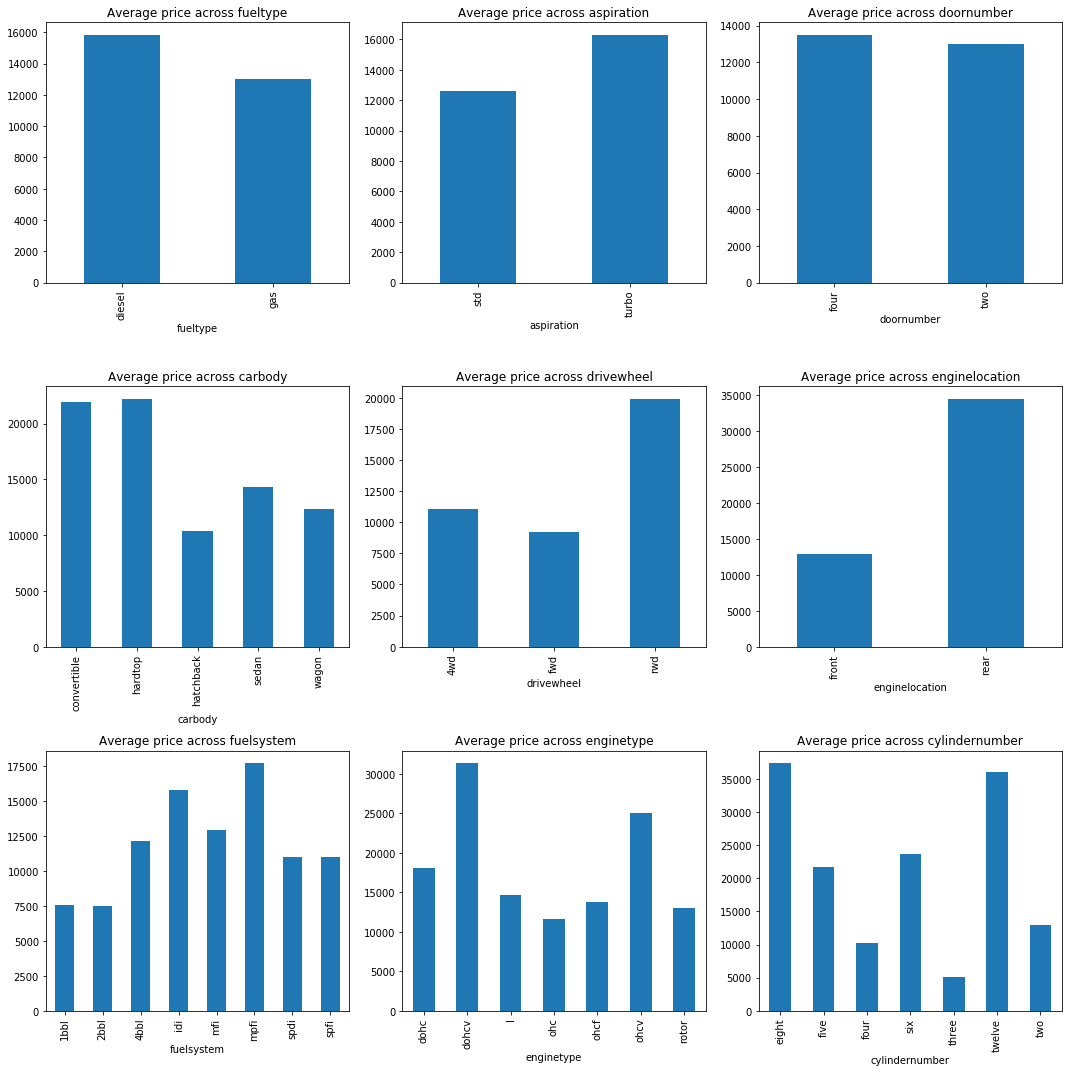

In [53]:
#Visualization of AVERAGE PRICE across each categorical variable:
from matplotlib import style
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
car_data.groupby('fueltype')['price'].mean().plot(kind='bar')
plt.title("Average price across fueltype")
plt.subplot(3,3,2)
car_data.groupby('aspiration')['price'].mean().plot(kind='bar')
plt.title("Average price across aspiration")
plt.subplot(3,3,3)
car_data.groupby('doornumber')['price'].mean().plot(kind='bar')
plt.title("Average price across doornumber")
plt.subplot(3,3,4)
car_data.groupby('carbody')['price'].mean().plot(kind='bar')
plt.title("Average price across carbody")
plt.subplot(3,3,5)
car_data.groupby('drivewheel')['price'].mean().plot(kind='bar')
plt.title("Average price across drivewheel")
plt.subplot(3,3,6)
car_data.groupby('enginelocation')['price'].mean().plot(kind='bar')
plt.title("Average price across enginelocation")
plt.subplot(3,3,7)
car_data.groupby('fuelsystem')['price'].mean().plot(kind='bar')
plt.title("Average price across fuelsystem")
plt.subplot(3,3,8)
car_data.groupby('enginetype')['price'].mean().plot(kind='bar')
plt.title("Average price across enginetype")
plt.subplot(3,3,9)
car_data.groupby('cylindernumber')['price'].mean().plot(kind='bar')
plt.title("Average price across cylindernumber")
plt.tight_layout()
style.use('classic')
plt.show()

#### 8 and 12 cylinders attract more price. mpfi and idi have more price. engine types dohcv and dhcv attract more price. 
#### same way for convertible and hardtop, diesel cars and cars with turbo are more pricey and four and two doors have little  variations compared to eachother

In [55]:
#Conversion of categorical variable to numeric type, without using HOT ENCODING:
conversion={"carbody": {'convertible':1,'hatchback':2,'sedan':3,'wagon':4,'hardtop':5}, 
            "drivewheel": {'rwd':1,'fwd':2,'4wd':3},
            "enginetype": {'dohc':1,'ohcv':2,'ohc':3,'l':4,'rotor':5,'ohcf':6,'dohcv':7},
            "cylindernumber": {'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},
            "fuelsystem": {'mpfi':1,'2bbl':2,'mfi':3,'1bbl':4,'spfi':5,'4bbl':6,'idi':7,'spdi':8},
            "enginelocation": {'front':1,'rear':0},
            "fueltype": {'gas':1,'diesel':2},
            "aspiration": {'std':1,'turbo':0},
            "doornumber": {'two':2,'four':4}}
car_data.replace(conversion,inplace=True)

In [58]:
#Conversion of CarName to numeric feature using cat.codes:
car_data['CarName']=car_data['CarName'].astype('category') #converting object into category
car_data['Carcompany']=car_data['CarName'].cat.codes #encoding numerical values 

In [59]:
#Top 5 data values after conversion:
car_data.head()

car_ID  symboling      CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3  alfa-romero         1           1           2        1   
1       2          3  alfa-romero         1           1           2        1   
2       3          1  alfa-romero         1           1           2        2   
3       4          2         audi         1           1           4        3   
4       5          2         audi         1           1           4        3   

   drivewheel  enginelocation  wheelbase  ...  fuelsystem  boreratio  stroke  \
0           1               1       88.6  ...           1       3.47    2.68   
1           1               1       88.6  ...           1       3.47    2.68   
2           1               1       94.5  ...           1       2.68    3.47   
3           2               1       99.8  ...           1       3.19    3.40   
4           3               1       99.4  ...           1       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   Carcompany  
0           0  
1           0  
2           0  
3           1  
4           1  

[5 rows x 27 columns]

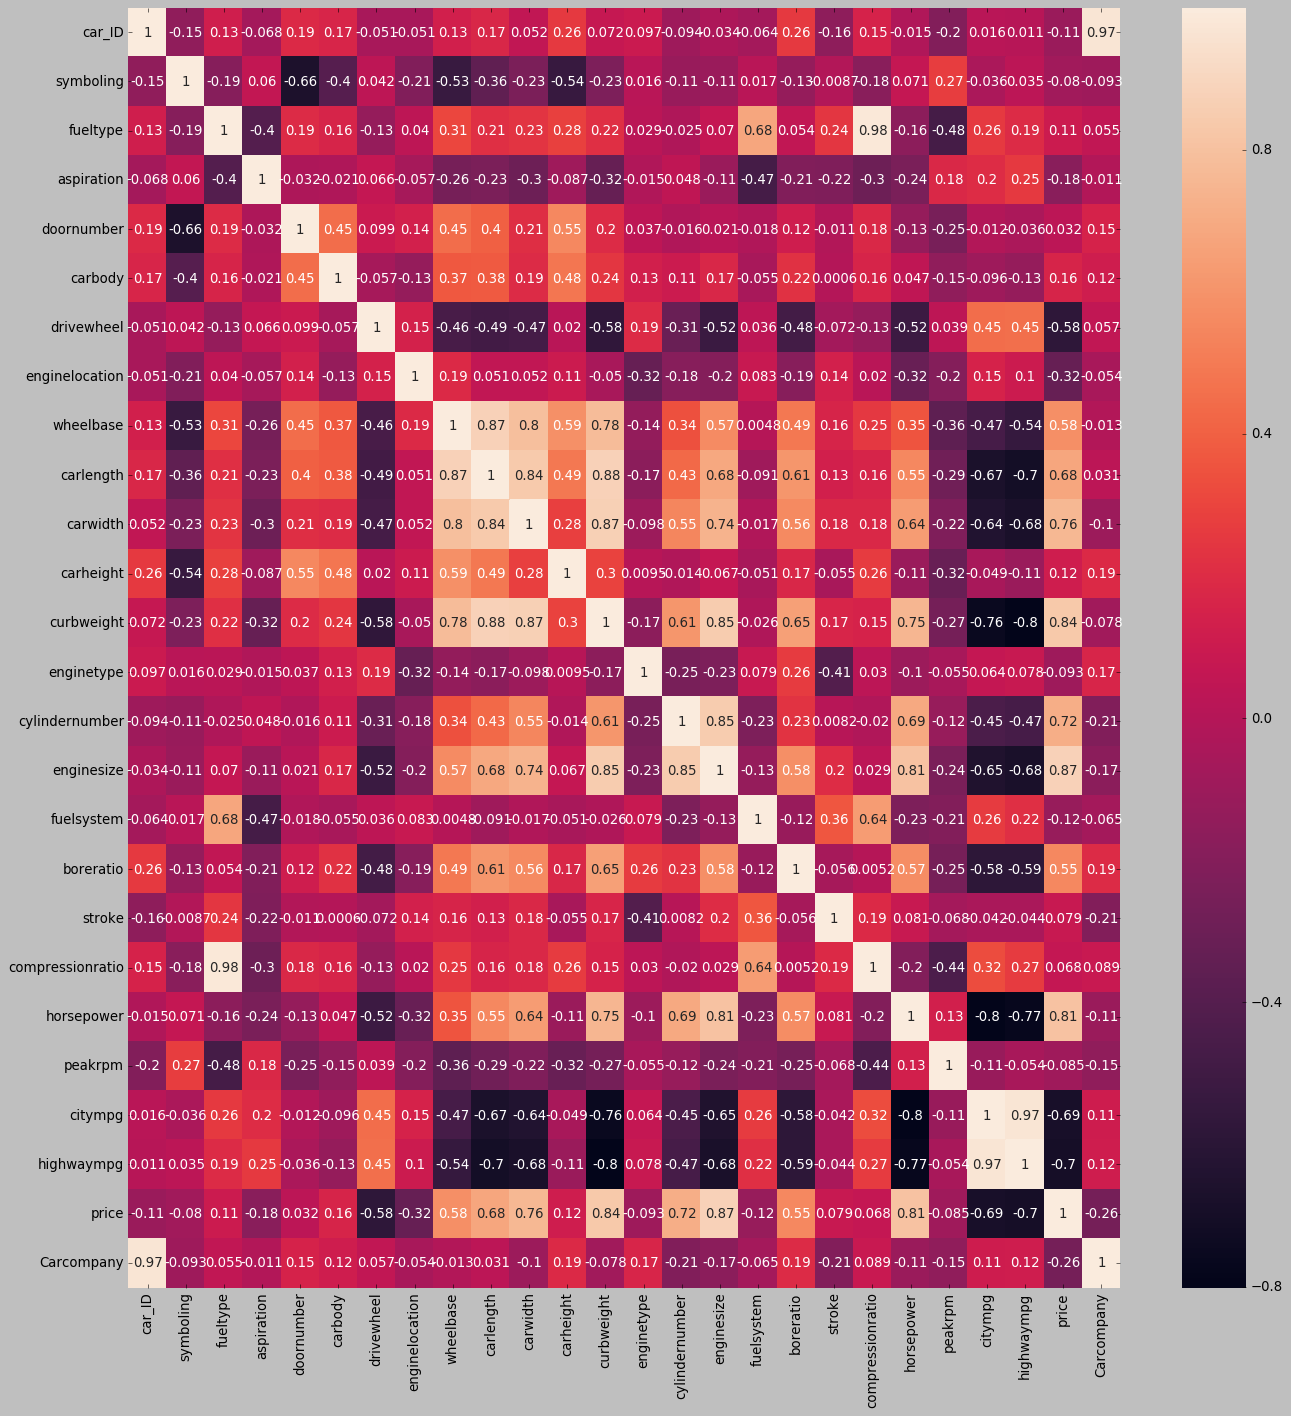

In [60]:
#Using Correlation - finding correlation:
plt.figure(figsize=(20,20))
correlation=car_data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [61]:
#Correlation with target variable: Lets get a list of variables that are now in our radar
cor_target=abs(correlation["price"])
#Selecting highly correlated features:
relevantfeatures=cor_target[cor_target>0.4] #conidering values greater than 40% of correlation
relevantfeatures

drivewheel        0.577992
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
cylindernumber    0.718305
enginesize        0.874145
boreratio         0.553173
horsepower        0.808139
citympg           0.685751
highwaympg        0.697599
price             1.000000
Name: price, dtype: float64

In [62]:
#Checking correlation acroos each highly correlated independent variables:
a=car_data[['drivewheel','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']].corr()
a

drivewheel  wheelbase  carlength  carwidth  curbweight  \
drivewheel    1.000000  -0.459745  -0.485649 -0.470751   -0.575111   
wheelbase    -0.459745   1.000000   0.874587  0.795144    0.776386   
carlength    -0.485649   0.874587   1.000000  0.841118    0.877728   
carwidth     -0.470751   0.795144   0.841118  1.000000    0.867032   
curbweight   -0.575111   0.776386   0.877728  0.867032    1.000000   
enginesize   -0.524307   0.569329   0.683360  0.735433    0.850594   
boreratio    -0.481827   0.488750   0.606454  0.559150    0.648480   
horsepower   -0.518686   0.353294   0.552623  0.640732    0.750739   
citympg       0.449581  -0.470414  -0.670909 -0.642704   -0.757414   
highwaympg    0.452220  -0.544082  -0.704662 -0.677218   -0.797465   

            enginesize  boreratio  horsepower   citympg  highwaympg  
drivewheel   -0.524307  -0.481827   -0.518686  0.449581    0.452220  
wheelbase     0.569329   0.488750    0.353294 -0.470414   -0.544082  
carlength     0.683360   0.606454    0.552623 -0.670909   -0.704662  
carwidth      0.735433   0.559150    0.640732 -0.642704   -0.677218  
curbweight    0.850594   0.648480    0.750739 -0.757414   -0.797465  
enginesize    1.000000   0.583774    0.809769 -0.653658   -0.677470  
boreratio     0.583774   1.000000    0.573677 -0.584532   -0.587012  
horsepower    0.809769   0.573677    1.000000 -0.801456   -0.770544  
citympg      -0.653658  -0.584532   -0.801456  1.000000    0.971337  
highwaympg   -0.677470  -0.587012   -0.770544  0.971337    1.000000

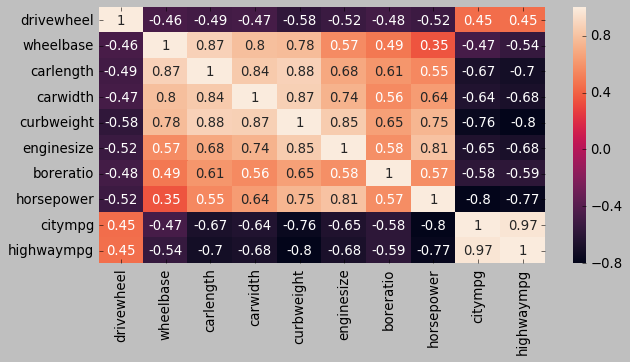

In [63]:
#Using  Correlation for the above correlated features:
plt.figure(figsize=(9,4))
sns.heatmap(a,annot=True)
plt.show()

In [65]:
#Dropping independent variables that are highly correlating against each other or tending to show same significances:
dat=car_data.drop(['carlength','highwaympg','citympg','boreratio','drivewheel','car_ID','CarName'],axis=1)

In [74]:
df_train, df_test = train_test_split(car_data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 27)
(62, 27)


In [135]:
#instantiating minmaxscalr
scaler = MinMaxScaler()

#identifying numerical variables
num_vars = ['drivewheel','wheelbase','carlength','carwidth','curbweight','enginesize',
            'boreratio','horsepower','citympg','highwaympg']

#fit on data, so it learns the xmax xmin and transform all the columns

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

car_ID  symboling      CarName  fueltype  aspiration  doornumber  \
122     123          1     plymouth         1           1           4   
125     126          3      porsche         1           1           2   
166     167          1       toyota         1           1           2   
1         2          3  alfa-romero         1           1           2   
199     200         -1        volvo         1           0           4   

     carbody  drivewheel  enginelocation  wheelbase  ...  enginesize  \
122        3         0.5               1   0.244828  ...    0.139623   
125        2         0.0               1   0.272414  ...    0.339623   
166        2         0.0               1   0.272414  ...    0.139623   
1          1         0.0               1   0.068966  ...    0.260377   
199        4         0.0               1   0.610345  ...    0.260377   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
122           2   0.230159    3.23               9.4    0.083333     5500   
125           1   1.000000    3.11               9.5    0.395833     5500   
166           1   0.444444    3.08               9.4    0.266667     6600   
1             1   0.626984    2.68               9.0    0.262500     5000   
199           1   0.746032    3.15               7.5    0.475000     5100   

      citympg  highwaympg  Carcompany  
122  0.500000    0.567568          14  
125  0.166667    0.270270          15  
166  0.361111    0.324324          19  
1    0.222222    0.270270           0  
199  0.111111    0.135135          21  

[5 rows x 26 columns]

In [78]:
df_train.describe()

car_ID   symboling    fueltype  aspiration  doornumber     carbody  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean    98.524476    0.797203    1.090909    0.818182    3.118881    2.776224   
std     58.977655    1.195999    0.288490    0.387050    0.996399    0.790966   
min      1.000000   -2.000000    1.000000    0.000000    2.000000    1.000000   
25%     48.500000    0.000000    1.000000    1.000000    2.000000    2.000000   
50%     97.000000    1.000000    1.000000    1.000000    4.000000    3.000000   
75%    147.500000    1.000000    1.000000    1.000000    4.000000    3.000000   
max    205.000000    3.000000    2.000000    1.000000    4.000000    5.000000   

       drivewheel  enginelocation   wheelbase   carlength  ...  fuelsystem  \
count  143.000000      143.000000  143.000000  143.000000  ...  143.000000   
mean     0.353147        0.993007    0.411141    0.525476  ...    2.461538   
std      0.283540        0.083624    0.205581    0.204848  ...    2.145317   
min      0.000000        0.000000    0.000000    0.000000  ...    1.000000   
25%      0.000000        1.000000    0.272414    0.399187  ...    1.000000   
50%      0.500000        1.000000    0.341379    0.502439  ...    2.000000   
75%      0.500000        1.000000    0.503448    0.669919  ...    2.000000   
max      1.000000        1.000000    1.000000    1.000000  ...    8.000000   

        boreratio      stroke  compressionratio  horsepower      peakrpm  \
count  143.000000  143.000000        143.000000  143.000000   143.000000   
mean     0.497946    3.250070         10.052587    0.227302  5130.069930   
std      0.207140    0.312529          3.794890    0.165511   481.273979   
min      0.000000    2.190000          7.000000    0.000000  4150.000000   
25%      0.305556    3.110000          8.600000    0.091667  4800.000000   
50%      0.500000    3.270000          9.000000    0.191667  5200.000000   
75%      0.682540    3.400000          9.400000    0.283333  5500.000000   
max      1.000000    4.170000         23.000000    1.000000  6600.000000   

          citympg  highwaympg         price  Carcompany  
count  143.000000  143.000000    143.000000  143.000000  
mean     0.344211    0.374976  13056.347322   11.811189  
std      0.186165    0.188477   7807.036883    6.259585  
min      0.000000    0.000000   5118.000000    0.000000  
25%      0.166667    0.216216   7554.000000    6.000000  
50%      0.333333    0.378378  10198.000000   12.000000  
75%      0.500000    0.527027  16465.000000   18.000000  
max      1.000000    1.000000  41315.000000   21.000000  

[8 rows x 26 columns]

## So far we did reading, understanding and visualizing data. we have also prepared the data for training
## Now lets train data

In [170]:
#checking target variable has only price and its dtype just to be sure
y_train.head()

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
Name: price, dtype: float64

In [139]:
#adding a constant
X_train_sm = sm.add_constant(X_train['horsepower'])

#create First Model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const          4412.744695
horsepower    38026.976303
dtype: float64

In [140]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.04e-34
Time:                        00:11:59   Log-Likelihood:                -1409.0
No. Observations:                 143   AIC:                             2822.
Df Residuals:                     141   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4412.7447    660.051      6.685      0.000    3107.869    5717.620
horsepower  3.803e+04   2350.312     16.180      0.000    3.34e+04    4.27e+04
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
#X_train.shape
#X_test, y_train, y_test

In [142]:
X_train_sm = X_train[['horsepower', 'enginesize']]
X_train_sm = sm.add_constant(X_train_sm)

#create Second Model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.17e-47
Time:                        00:12:00   Log-Likelihood:                -1375.4
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     140   BIC:                             2766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2260.2256    573.786      3.939      0.000    1125.820    3394.631
horsepower  1.372e+04   3240.433      4.235      0.000    7316.379    2.01e+04
enginesize  3.181e+04   3468.712      9.170      0.000     2.5e+04    3.87e+04
==============================================================================
Omnibus:                       15.465   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.301
Skew:                           0.589   Prob(JB):                     1.44e-05
Kurtosis:                       4.534   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### the higher the variable is related to all the other variables the higher the ViF value will be

In [171]:
X_train_sm = X_train[['horsepower', 'enginesize', 'drivewheel','wheelbase','carlength','carwidth','curbweight',
            'boreratio','horsepower','citympg','highwaympg']]
X_train_sm = sm.add_constant(X_train_sm)

#create Second Model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     68.69
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.23e-47
Time:                        00:27:46   Log-Likelihood:                -1353.6
No. Observations:                 143   AIC:                             2729.
Df Residuals:                     132   BIC:                             2762.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2609.7609   2336.963      1.117      0.266   -2012.983    7232.505
horsepower  4108.4495   2159.263      1.903      0.059    -162.787    8379.686
enginesize  1.684e+04   4404.257      3.825      0.000    8132.216    2.56e+04
drivewheel -3454.7042   1226.648     -2.816      0.006   -5881.135   -1028.274
wheelbase    -54.5550   3577.055     -0.015      0.988   -7130.323    7021.213
carlength  -3513.7735   4083.221     -0.861      0.391   -1.16e+04    4563.241
carwidth    9483.0087   3549.759      2.671      0.009    2461.234    1.65e+04
curbweight   1.01e+04   4861.384      2.077      0.040     481.608    1.97e+04
boreratio  -1463.0131   1774.427     -0.824      0.411   -4973.004    2046.978
horsepower  4108.4495   2159.263      1.903      0.059    -162.787    8379.686
citympg      -84.1351   7610.899     -0.011      0.991   -1.51e+04     1.5e+04
highwaympg  -364.8106   7281.305     -0.050      0.960   -1.48e+04     1.4e+04
==============================================================================
Omnibus:                       42.826   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.666
Skew:                           1.081   Prob(JB):                     1.05e-31
Kurtosis:                       7.390   Cond. No.                     1.89e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### enginesize, drivewheel, carwidth, curbweight are less than 0.05 in pvalue, rest are not. 
### dropping values based on pvalue

In [194]:
car_data.shape

(205, 25)

In [219]:
car_data.head()
car_data=pd.get_dummies(car_data)

In [220]:
cols_to_drop=car_data.corr()[(car_data.corr()['price']<=0.5) & (car_data.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)

In [221]:
car_data.drop(cols_to_drop,axis=1,inplace=True)

In [222]:
car_data.shape

(205, 7)

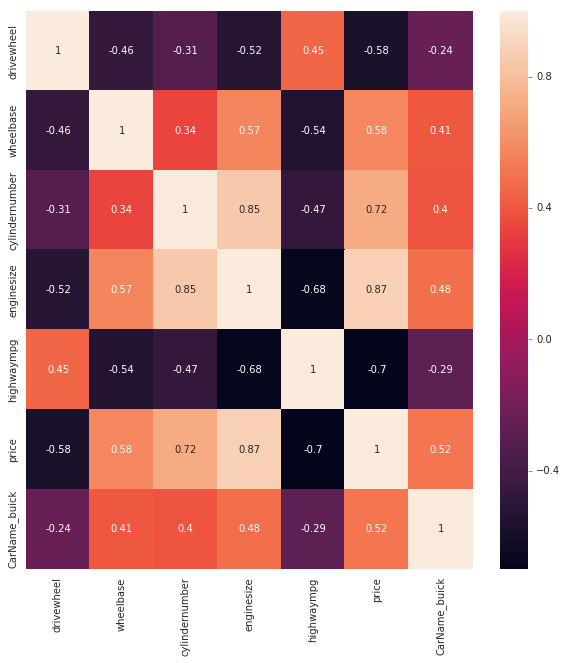

In [223]:
plt.figure(figsize=[10,10])
sns.heatmap(car_data.corr(),annot=True)

We will also drop all columns having correlation to price around 0.5. We will also drop carlength and carwidth since they are highly correlated to each other and significantly correlated with enginesize.

In [225]:
car_data.drop(['CarName_buick'],axis=1,inplace=True)

In [226]:
car_data.head()

drivewheel  wheelbase  cylindernumber  enginesize  highwaympg    price
0           1       88.6               4         130          27  13495.0
1           1       88.6               4         130          27  16500.0
2           1       94.5               6         152          26  16500.0
3           2       99.8               4         109          30  13950.0
4           3       99.4               5         136          22  17450.0

In [227]:
predictors=car_data.drop('price',axis=1)
target=car_data.price

In [228]:
predictors1=predictors['enginesize']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.35e-65
Time:                        00:56:19   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [230]:
predictors2=predictors[['enginesize','drivewheel']]
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     366.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.37e-68
Time:                        00:56:56   Log-Likelihood:                -1975.4
No. Observations:                 205   AIC:                             3957.
Df Residuals:                     202   BIC:                             3967.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1932.2227   1643.216     -1.176      0.2

In [234]:
predictors6=predictors[['enginesize','drivewheel','cylindernumber', 'highwaympg']]
import statsmodels.api as sm
predictors6= sm.add_constant(predictors6)
lm_6 = sm.OLS(target,predictors6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.05e-68
Time:                        00:57:48   Log-Likelihood:                -1967.5
No. Observations:                 205   AIC:                             3945.
Df Residuals:                     200   BIC:                             3962.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6236.1738   2604.523      2.

In [235]:
pred=lm_6.predict(predictors6)

Text(0, 0.5, 'Car Price')

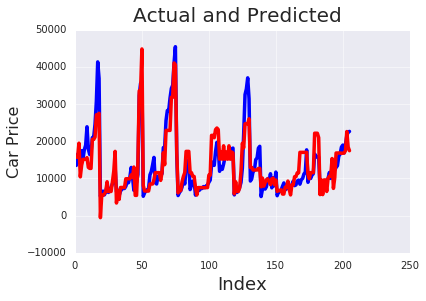

In [236]:
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Mean_Squared_Error : 12705190.955061868
r_square_value : 0.7999511297224635


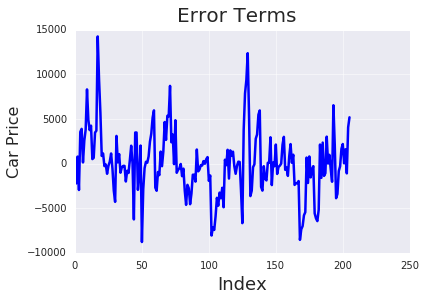

In [237]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [239]:
pred=lm_2.predict(predictors2)

Text(0, 0.5, 'Car Price')

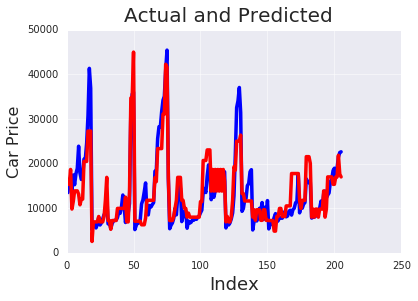

In [240]:
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Mean_Squared_Error : 13725893.98660714
r_square_value : 0.7838797074926278


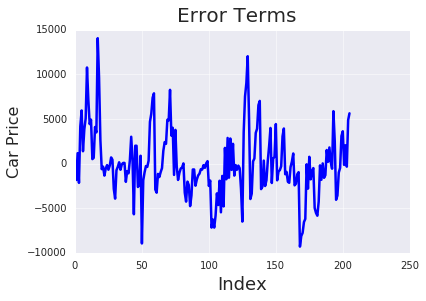

In [241]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

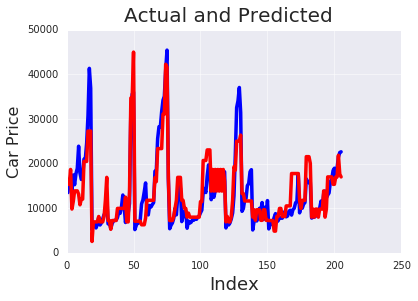

In [242]:
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Mean_Squared_Error : 13725893.98660714
r_square_value : 0.7838797074926278


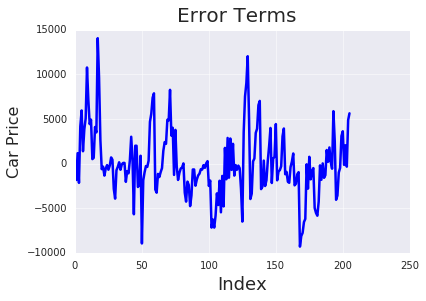

In [243]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)